In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.17.1'

In [ ]:
!python -V

Python 3.10.12


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/capstone1_v3_06_0.852.weights.keras')

In [ ]:
#!wget 'url' -0 fake.jpeg

In [ ]:
import numpy as np
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

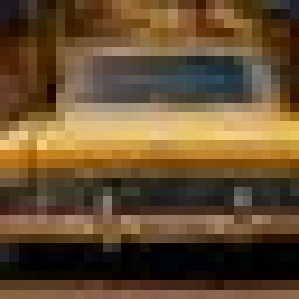

In [ ]:
image_path = '/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/data/CIFAKE/final_test/FAKE/990 (2).jpg'
load_img(image_path, target_size=(299,299))

In [ ]:
img = load_img(path, target_size=(299,299))

x = np.array(img)
x = np.array([x])
X = preprocess_input(x)
X.shape

(1, 299, 299, 3)

In [ ]:
#from os import pread
classes = ["FAKE", "REAL"]

pred = model.predict(X)

dict(zip(classes, pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


{'FAKE': 1.3736932, 'REAL': -1.5569493}

CONVERSION TO TFLITE

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/capstone1model.tflite', 'wb') as f_out:
  f_out.write(tflite_model)
#

Saved artifact at '/tmp/tmp7abmogqw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_44')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  132613084695712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084698352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084704336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084701520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084700640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084605504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084744688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084749088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084745744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084748384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613084751

In [ ]:
#!ls -lh

total 8.0K
drwx------ 6 root root 4.0K Dec 30 19:31 drive
drwxr-xr-x 1 root root 4.0K Dec 19 14:20 sample_data


USE TENSORFLOWLITE MODEL

In [ ]:
import tensorflow.lite as tflite

In [ ]:
tflite_model_name = '/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/capstone1model.tflite'
image_path = '/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/data/CIFAKE/final_test/FAKE/990 (2).jpg'

In [ ]:
# load model, get input and output index
interpreter = tflite.Interpreter(model_path=tflite_model_name)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

#inference; set input, invoke, get output
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [ ]:
classes = ["FAKE", "REAL"]

dict(zip(classes, preds[0]))

{'FAKE': 1.3736973, 'REAL': -1.5569532}

GET RID OF TENSORFLOW DEPENDENCIES FOR LOADING THE MODEL AND PREPROCESSING THE IMAGE (load_img and preprocess_input) to avoid the use of tensorflow methods

In [ ]:
from PIL import Image

with Image.open(image_path) as img:
  img = img.resize((299,299), Image.NEAREST)

X = np.array(img, 'float32')
X = np.array([X])

def preprocess_input(x):
  x /= 127.5
  x -= 1.
  return x

X = preprocess_input(X)

#inference; set input, invoke, get output
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

classes = ["FAKE", "REAL"]

dict(zip(classes, preds[0]))

{'FAKE': 1.3736973, 'REAL': -1.5569532}

SIMPLER WAY INSTEAD OF USING PREPROCESS FUNCTION AND PIL FOR LOADING IMAGE IS TO USE KERAS IMAGE HELPER

In [ ]:
pip install keras_image_helper

In [ ]:
import tensorflow.lite as tflite
from keras_image_helper import create_preprocessor

# load model, get input and output index
interpreter = tflite.Interpreter(model_path=tflite_model_name)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

#Create preprocessor
preprocessor = create_preprocessor('xception', target_size=(299,299))
image_path = '/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/data/CIFAKE/final_test/FAKE/990 (2).jpg'
X = preprocessor.from_path(image_path)

#inference/prediction; set input, invoke, get output
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

#Post prediction
classes = ["FAKE", "REAL"]

dict(zip(classes, preds[0]))

{'FAKE': 1.3736973, 'REAL': -1.5569532}

BEST AND FINAL WAY IS TO INSTALL AND USE TENSORFLOWLITE DIRECTLY VIA THE RUNTIME

In [ ]:
pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.9 MB/s eta 0:00:00


In [ ]:
pip install keras_image_helper

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tflite_model_name = '/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/capstone1model.tflite'
#image_path = '/content/drive/MyDrive/AI_and_python/ML-Zoomcamp/data/CIFAKE/final_test/FAKE/990 (2).jpg' #when using preprocessor from path
image_path = 'https://plus.unsplash.com/premium_photo-1664303218668-03fa4e612038?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxmZWF0dXJlZC1waG90b3MtZmVlZHwxfHx8ZW58MHx8fHx8'
#when using preprocessor from url
#image_path = 'https://drive.google.com/drive/u/0/folders/1CDlfxCW4eehW_t7ZsieYIZZhzUYJX0uX'



In [ ]:
#Create preprocessor
from keras_image_helper import create_preprocessor
preprocessor = create_preprocessor('xception', target_size=(299,299))

X = preprocessor.from_url(image_path)
X

array([[[[-0.16862744, -0.09019607, -0.09803921],
         [-0.1607843 , -0.0745098 , -0.10588235],
         [-0.29411763, -0.23921567, -0.29411763],
         ...,
         [-0.19215685, -0.29411763, -0.41960782],
         [-0.17647058, -0.3098039 , -0.45098037],
         [-0.23921567, -0.372549  , -0.5137255 ]],

        [[-0.23921567, -0.1607843 , -0.16862744],
         [-0.18431371, -0.09803921, -0.14509803],
         [-0.36470586, -0.3098039 , -0.372549  ],
         ...,
         [-0.17647058, -0.27843136, -0.40392154],
         [-0.18431371, -0.31764704, -0.4588235 ],
         [-0.20784312, -0.34117645, -0.4823529 ]],

        [[-0.19999999, -0.12941176, -0.15294117],
         [-0.27843136, -0.20784312, -0.24705881],
         [-0.2862745 , -0.23137254, -0.29411763],
         ...,
         [-0.25490195, -0.35686272, -0.4823529 ],
         [-0.25490195, -0.372549  , -0.52156866],
         [-0.23921567, -0.35686272, -0.5058824 ]],

        ...,

        [[-0.36470586, -0.5294118 , -0

In [ ]:
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

# load model, get input and output index
interpreter = tflite.Interpreter(model_path=tflite_model_name)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

#Create preprocessor
preprocessor = create_preprocessor('xception', target_size=(299,299))

X = preprocessor.from_url(image_path)

#inference/prediction; set input, invoke, get output
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

#Post prediction
classes = ["FAKE", "REAL"]

dict(zip(classes, preds[0]))

{'FAKE': 2.9571748, 'REAL': -2.8008363}